103.4301408
103
96.96670344
96


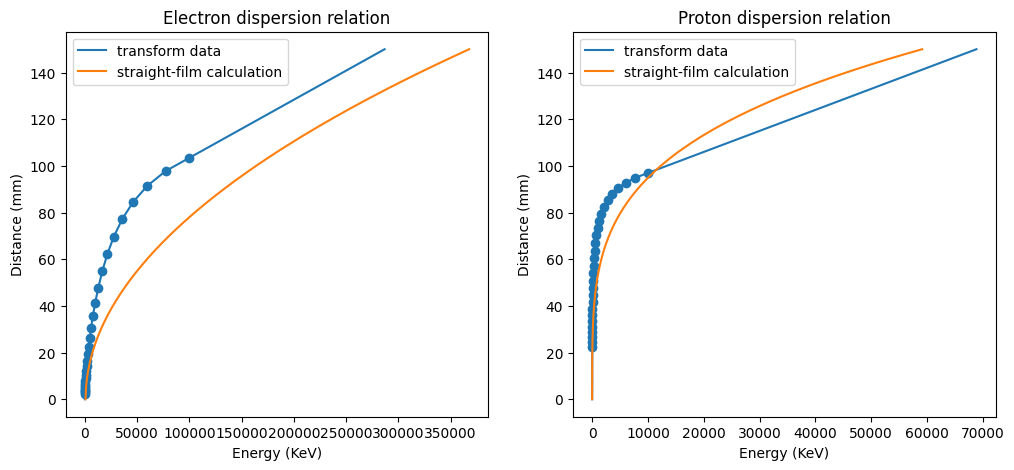

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

def lineout(array, w1, w2):
    width = np.shape(array)[0]
    length = np.shape(array)[1]
    line_data = array[w2,:]
    for i in range(length):
        line_data[i] = (1/(w2+1-w1))*np.sum(array[w1:w2+1,i])
    return line_data

def theoretical_dispersion(x,A,d):
    energy = A*(x**2+d**2)**2
    return energy

def theoretical_dispersion_relativistic_e(x,a,D):
    m = 9.1*10**-31
    c = 3*10**8
    E = m*c**2
    eV = 1.6*10**-19
    energy = (1/1000)*(1/eV)*0.5*(-E+np.sqrt(E**2+((eV*0.87*c)**2)*(1/D)*((((x-a)**2)+D)**2)))
    return energy

def theoretical_dispersion_relativistic_p(x,a,D):
    m = 1.67*10**-27
    c = 3*10**8
    E = m*c**2
    eV = 1.6*10**-19
    energy = (1/1000)*(1/eV)*0.5*(-E+np.sqrt(E**2+((eV*0.87*c)**2)*(1/D)*((((x-a)**2)+D)**2)))
    return energy

energy_data_protons = np.loadtxt('NEPPS_Dispersion_Protons_087T.txt', skiprows=1)
energy_data_electrons = np.loadtxt('NEPPS_Dispersion_Electrons_087T.txt', skiprows=1)

def linear_fit(x,m,c):
    y = m*x+c
    return y

def transform_electron_axis(x, R):
    energy = np.zeros(len(x))
    start = energy_data_electrons[-1,1]
    print(start)
    for i in range(len(x)):
        if np.abs((1/R)*x[i]-start) == np.min(np.abs((1/R)*x-start)):
            index = i
    print(index)
    energy[0:index] = np.interp((1/R)*x[0:index],np.array(energy_data_electrons[:,1]),np.array(energy_data_electrons[:,0]))

    deltax = energy_data_electrons[-1,1]-energy_data_electrons[-2,1]

    deltaE = energy_data_electrons[-1,0]-energy_data_electrons[-2,0]

    grad = deltaE/deltax

    intercept = energy_data_electrons[-1,0] - grad*energy_data_electrons[-1,1]

    energy[index:] = linear_fit((1/R)*x[index:], grad, intercept)

    return energy

def transform_proton_axis(x, R):
    energy = np.zeros(len(x))
    start = energy_data_protons[-1,1]
    print(start)
    for i in range(len(x)):
        if np.abs((1/R)*x[i]-start) == np.min(np.abs((1/R)*x-start)):
            index = i
    print(index)
    energy[0:index] = np.interp((1/R)*x[0:index],np.array(energy_data_protons[:,1]),np.array(energy_data_protons[:,0]))

    deltax = energy_data_protons[-1,1]-energy_data_protons[-2,1]

    deltaE = energy_data_protons[-1,0]-energy_data_protons[-2,0]

    grad = deltaE/deltax

    intercept = energy_data_protons[-1,0] - grad*energy_data_protons[-1,1]

    energy[index:] = linear_fit((1/R)*x[index:], grad, intercept)

    return energy

def find_index(axis,start,end):
    for i in range(len(axis)):
        if np.abs(axis[i]-start) == np.min(np.abs(axis-start)):
            start_i = i

    for i in range(len(axis)):
        if np.abs(axis[i]-end) == np.min(np.abs(axis-end)):
            end_i = i
    return start_i, end_i


r = 10

x_axis = np.linspace(0,1500,150)


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(transform_electron_axis(x_axis,10),0.1*x_axis,label='transform data')
axs[0].scatter(energy_data_electrons[:,0],energy_data_electrons[:,1])
axs[0].plot(theoretical_dispersion_relativistic_e((1/10000)*x_axis,0.0,0.008**2),0.1*x_axis,label='straight-film calculation')
axs[0].set_xlabel("Energy (KeV)")
axs[0].set_ylabel("Distance (mm)")
axs[0].set_title("Electron dispersion relation")
axs[0].legend()

axs[1].plot(transform_proton_axis(x_axis,10),0.1*x_axis,label='transform data')
axs[1].scatter(energy_data_protons[:,0],energy_data_protons[:,1])
axs[1].plot(theoretical_dispersion_relativistic_p((1/10000)*x_axis,0.001,0.012**2),0.1*x_axis,label='straight-film calculation')
axs[1].set_xlabel("Energy (KeV)")
axs[1].set_ylabel("Distance (mm)")
axs[1].set_title("Proton dispersion relation")
axs[1].legend()

ther_, pcov_ = curve_fit(theoretical_dispersion, energy_data_electrons[:,1], energy_data_electrons[:,0], p0=[0.0028,5])

energy = theoretical_dispersion((1/10)*x_axis, ther_[0], ther_[1])

#axs[0].plot(energy,x_axis)

96.96670344
969
96.96670344
969


C:\Users\rayne\AppData\Local\Temp\ipykernel_17576\4177034167.py:32: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(np.array([0, 125, 250, 375, 500, 717, 789]), np.array([0.0005+d0, 0.0005+2*d0, 0.0005+3*d0, 0.0005+4*d0, 0.0005+5*d0, 0.0204, 0.0784]), 10)


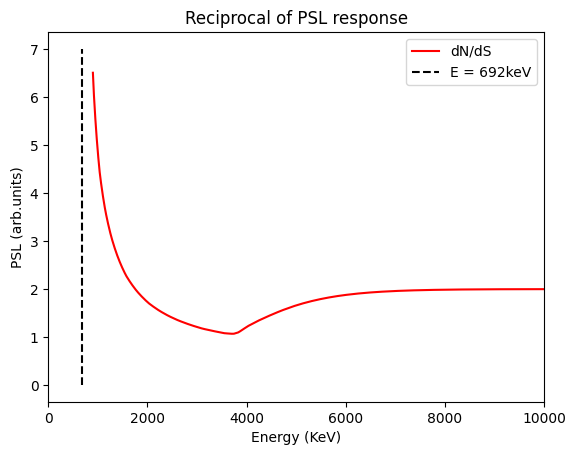

In [2]:
Proton_PSL_data = np.loadtxt('Proton_PSL_linylinx.txt', delimiter=',', skiprows=1)
Proton_PSL_data_low = np.loadtxt('Proton_PSL_low.txt', delimiter=',', skiprows=1)

TR_proton_energy_axis = 1000*Proton_PSL_data[:,0]
TR_proton_PSL_axis = Proton_PSL_data[:,1]

Proton_PSL_data = np.loadtxt('MS_Proton.txt', delimiter=',', skiprows=2)

MS_proton_energy_axis = 1000*Proton_PSL_data[:,0]
MS_proton_PSL_axis = Proton_PSL_data[:,1]

#plt.plot(TR_proton_energy_axis,TR_proton_PSL_axis)

#plt.plot(MS_proton_energy_axis,MS_proton_PSL_axis)

#plt.scatter(TR_proton_energy_axis,TR_proton_PSL_axis)

def find_exp_shift(E, A, a, shift):
    func = (A*np.exp(-a*E))+shift
    return func

def find_poly(E, A, a, shift):
    func = (A*E)**a+shift
    return func

def TR_proton_PSL_scale(Espace):
    PSL = np.interp(Espace,TR_proton_energy_axis,TR_proton_PSL_axis)
    return PSL

d0 = 0.00005

coefficients = np.polyfit(np.array([0, 125, 250, 375, 500, 717, 789]), np.array([0.0005+d0, 0.0005+2*d0, 0.0005+3*d0, 0.0005+4*d0, 0.0005+5*d0, 0.0204, 0.0784]), 10)

x = np.linspace(0,800,50)

poly_fit_MS = np.poly1d(coefficients)

#plt.plot(x,poly_fit_MS(x))

t_2, p_2 = curve_fit(find_exp_shift, np.linspace(4000,5000,100), np.interp(np.linspace(4000,5000,100),MS_proton_energy_axis,MS_proton_PSL_axis), p0=(1,0.0001,0.4))

fit_2 = find_exp_shift(np.linspace(4000,10000,100), t_2[0], t_2[1], t_2[2])

def MS_proton_PSL_scale(Espace, nearzero = False):

    t_2, p_2 = curve_fit(find_exp_shift, np.linspace(4000,5000,100), np.interp(np.linspace(4000,5000,100),MS_proton_energy_axis,MS_proton_PSL_axis), p0=(1,0.0001,0.4))

    fit_2 = find_exp_shift(np.linspace(4000,10000,100), t_2[0], t_2[1], t_2[2])

    PSL = np.zeros(len(Espace))
    start = MS_proton_energy_axis[0]
    end = MS_proton_energy_axis[-1]
    
    for i in range(len(Espace)):
        if np.abs(Espace[i]-start) == np.min(np.abs(Espace-start)):
            start_index = i

    for i in range(len(Espace)):
        if np.abs(Espace[i]-end) == np.min(np.abs(Espace-end)):
            end_index = i

    PSL[start_index:end_index] = np.interp(Espace[start_index:end_index],MS_proton_energy_axis,MS_proton_PSL_axis)
    #PSL[:start_index] = MS_proton_PSL_axis[0]
    PSL[:start_index] = 100
    if nearzero == True:
        PSL[:start_index] = poly_fit_MS(Espace[:start_index])
    PSL[end_index:] = np.interp(Espace[end_index:],np.linspace(4000,10000,100),fit_2)

    return PSL

def find_exp(E, A, a):
    func = (A*np.exp(-a*E))
    return func

def find_2exp(E, A, a, B, b):
    func = func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))
    return func

def find_exp_proton(E, A, a, shift):
    func = (A*np.exp(-a*E))*TR_proton_PSL_scale(E)+shift
    return func

def find_2exp_proton(E, A, a, B, b, shift):
    func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))*TR_proton_PSL_scale(E)+shift
    return func

##############################################################

energy_data_protons = np.loadtxt('NEPPS_Dispersion_Protons_087T.txt', skiprows=1)
energy_data_electrons = np.loadtxt('NEPPS_Dispersion_Electrons_087T.txt', skiprows=1)

def dxdE_electrons(x_in):
    x_d = np.array(energy_data_electrons[:,1])
    E_d = np.array(energy_data_electrons[:,0])
    dxde_data = np.gradient(x_d,E_d)
    dxde = np.interp(0.1*x_in,x_d,dxde_data)
    return dxde

def dxdE_protons(x_in):
    x_data = np.array(energy_data_protons[:,1])
    E_data = np.array(energy_data_protons[:,0])
    dxde_data = np.gradient(x_data,E_data)
    dxde = np.interp(0.1*x_in,x_data,dxde_data)
    return dxde

x_axis = np.linspace(0,1400,1400)

#plt.plot(transform_proton_axis(x_axis,10), TR_proton_PSL_scale(transform_proton_axis(x_axis,10)), label = 'TR proton response')
#plt.scatter(TR_proton_energy_axis, TR_proton_PSL_axis)

#plt.plot(transform_proton_axis(x_axis,10), MS_proton_PSL_scale(transform_proton_axis(x_axis,10),nearzero=True), label = 'MS proton response')
#plt.scatter(MS_proton_energy_axis, MS_proton_PSL_axis)

#plt.plot(np.linspace(4000,10000,100),find_exp_shift(np.linspace(4000,10000,100), t[0], t[1], t[2]))
plt.plot(transform_proton_axis(x_axis,10)[720:], 1/MS_proton_PSL_scale(transform_proton_axis(x_axis,10)[720:],nearzero=True), 'r', label = 'dN/dS')
plt.plot(691.5*np.ones(10),np.linspace(0,7,10),'k--', label = 'E = 692keV')


#plt.plot(x, fit1)

plt.xlim(0,10000)
plt.xlabel("Energy (KeV)")
plt.ylabel("PSL (arb.units)")
plt.title("Proton PSL response")
plt.title("Reciprocal of PSL response")
plt.legend()

Text(0.5, 1.0, 'MS Electron PSL response')

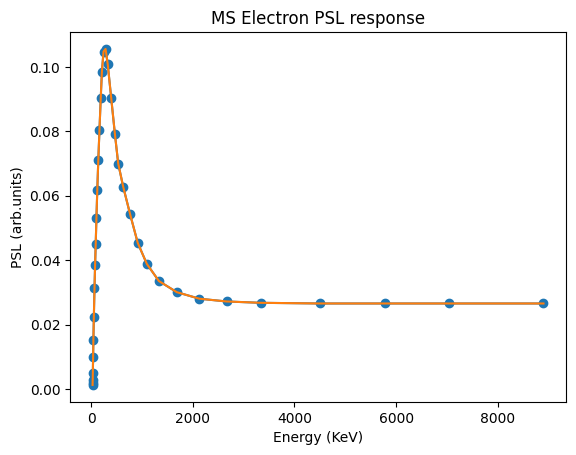

In [3]:
import numpy as np

MS_signal_data = np.loadtxt('MS_signal.txt', skiprows=1) # Adjust delimiter if needed
MS_energy_axis = 1000*MS_signal_data[:,0]
MS_PSL_axis = MS_signal_data[:,1]

plt.plot(MS_energy_axis,MS_PSL_axis)

def MS_PSL_scale(Espace):
    PSL = np.interp(Espace,MS_energy_axis,MS_PSL_axis)
    return PSL

def find_exp_electron(E, A, a, shift):
    func = (A*np.exp(-a*E))*MS_PSL_scale(E)+shift
    return func

def find_2exp_electron(E, A, a, B, b, shift):
    func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))*MS_PSL_scale(E)+shift
    return func

# Assuming your text file is named 'data.txt' and contains a 2D array
energy_data = np.loadtxt('Electron_Dispersion_Z_vs_Ebeam_0028T.txt', skiprows=8) # Adjust delimiter if needed

MS_signal_data = np.loadtxt('MS_signal.txt', skiprows=1) # Adjust delimiter if needed
MS_energy_axis = 1000*MS_signal_data[:,0]
MS_PSL_axis = MS_signal_data[:,1]

plt.plot(MS_energy_axis,MS_PSL_axis)
plt.scatter(MS_energy_axis,MS_PSL_axis)
plt.xlabel("Energy (KeV)")
plt.ylabel("PSL (arb.units)")
plt.title("MS Electron PSL response")
#plt.plot(transform_electron_axis(x_axis,10),MS_PSL_scale(transform_electron_axis(x_axis,10)))
#print(np.shape(energy_data[:,0]))
#print(np.shape(MS_energy_axis))
#plt.xlim([0,100000])
#print(np.shape(data))

96.96670344
969
96.96670344
969
96.96670344
969
96.96670344
969
103.4301408
1034
103.4301408
1034
103.4301408
1034
103.4301408
1034


Text(0.5, 1.0, 'Gradient (dx/dE) for electrons')

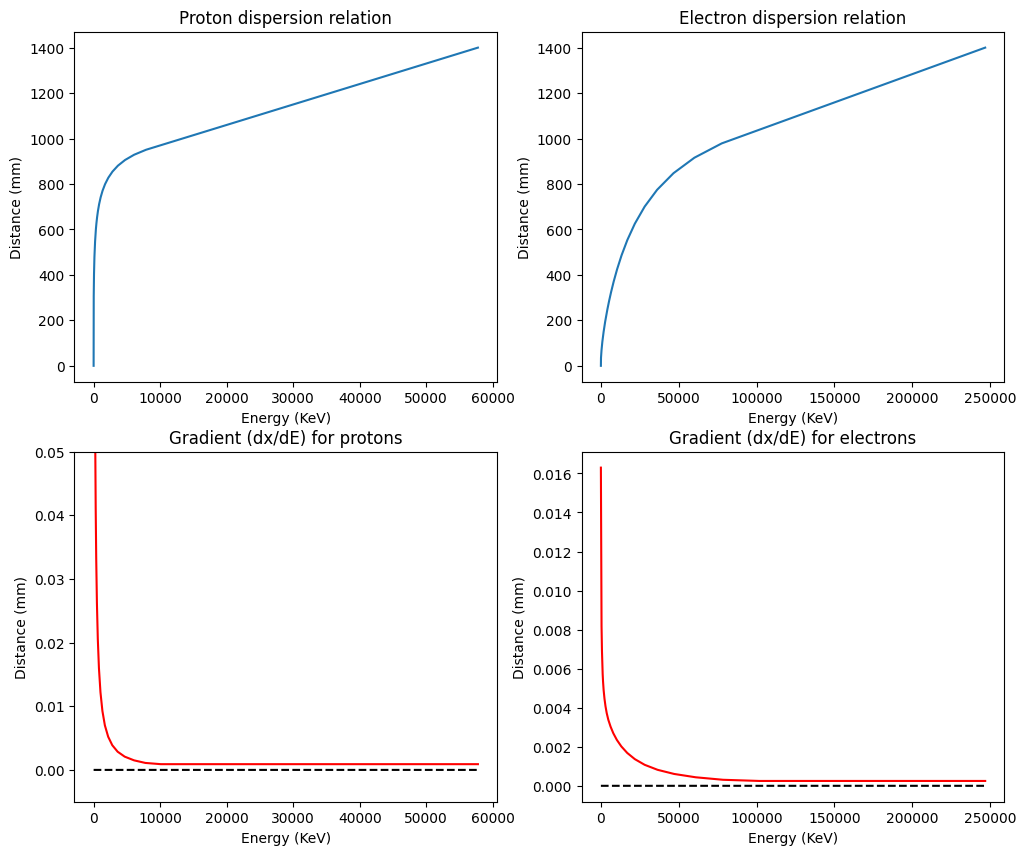

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0,0].plot(transform_proton_axis(x_axis,10),x_axis)
#axs[0].set_xlim(-500,10000)
axs[0,0].set_xlabel("Energy (KeV)")
axs[0,0].set_ylabel("Distance (mm)")
axs[0,0].set_title("Proton dispersion relation")

axs[1,0].plot(transform_proton_axis(x_axis,10),dxdE_protons(x_axis),'r')
axs[1,0].plot(transform_proton_axis(x_axis,10),0*transform_proton_axis(x_axis,10),'k--')
#axs[1].set_xlim(-500,10000)
axs[1,0].set_ylim(-0.005,0.05)
axs[1,0].set_xlabel("Energy (KeV)")
axs[1,0].set_ylabel("Distance (mm)")
axs[1,0].set_title("Gradient (dx/dE) for protons")

axs[0,1].plot(transform_electron_axis(x_axis,10),x_axis)
#axs[0].set_xlim(-500,10000)
axs[0,1].set_xlabel("Energy (KeV)")
axs[0,1].set_ylabel("Distance (mm)")
axs[0,1].set_title("Electron dispersion relation")

axs[1,1].plot(transform_electron_axis(x_axis,10),dxdE_electrons(x_axis),'r')
axs[1,1].plot(transform_electron_axis(x_axis,10),0*transform_electron_axis(x_axis,10),'k--')
#axs[1].set_xlim(-500,10000)
#axs[1,1].set_ylim(-0.005,0.05)
axs[1,1].set_xlabel("Energy (KeV)")
axs[1,1].set_ylabel("Distance (mm)")
axs[1,1].set_title("Gradient (dx/dE) for electrons")


96.96670344
969


(0.0, 10.0)

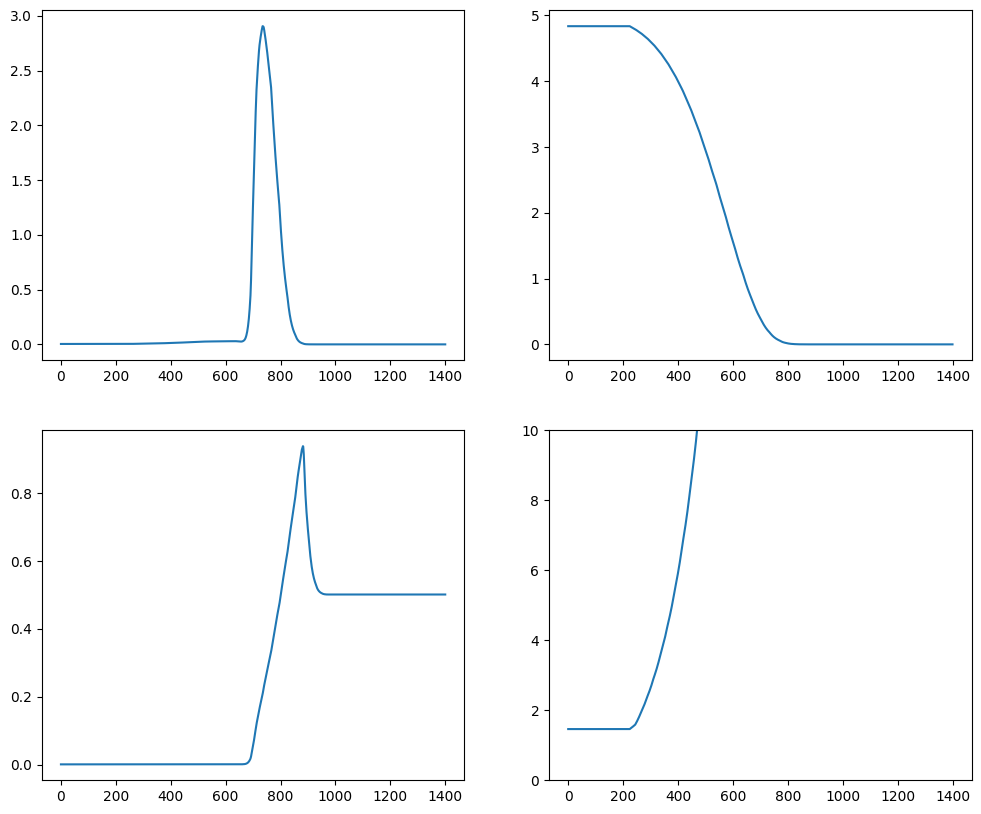

In [5]:
#here we plot what the theoretical lineout should look like given an exponential distribution of energies
x_theoretical = np.linspace(0,1400,1400)
E_theoretical = transform_proton_axis(x_theoretical,10)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

A = 5
#a = (1/100)
a = (1/300)

dNdE = A*np.exp(-a*E_theoretical)
dSdN = MS_proton_PSL_scale(E_theoretical,nearzero=True)
axs[1,0].plot(x_theoretical,dSdN)
#dSdN = 1
#dSdN = MS_proton_PSL_scale(E_theoretical)
dSdE = dNdE*dSdN
dSdx = dSdE/dxdE_protons(x_theoretical)

axs[0,0].plot(x_theoretical,dSdx)

axs[0,1].plot(x_theoretical,dNdE)

axs[1,1].plot(x_theoretical,1/(dxdE_protons(x_theoretical)))
axs[1,1].set_ylim(0,10)
#axs[1,1].set_xlim(0,300)

#axs[0,0].plot(x_theoretical,transform_proton_axis(x_theoretical,10))

96.96670344
969
Temperature in keV =  299.9999999999999
4.999999999999992
2.302585092994046


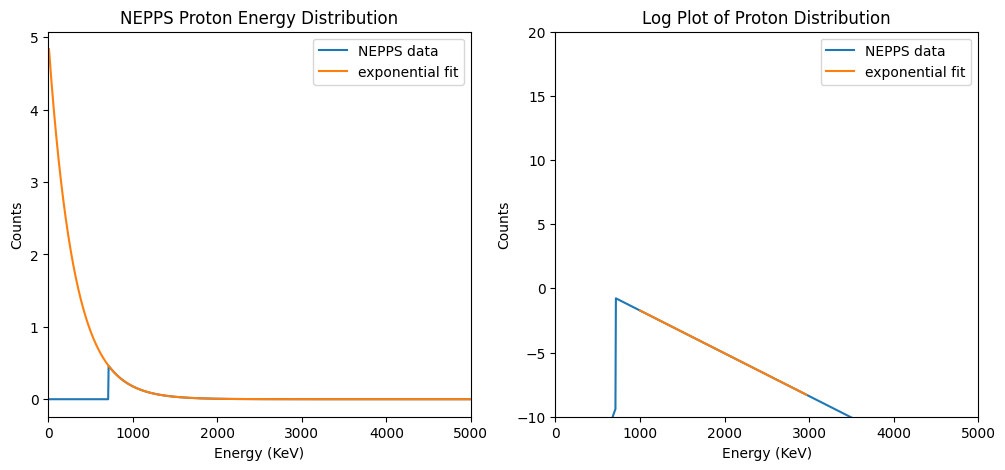

In [6]:
x = np.linspace(0,1400,1400)

E = transform_proton_axis(x,10)

dSdN = MS_proton_PSL_scale(E,nearzero=False)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

dSdE = dSdx*dxdE_protons(x)

dNdE = np.divide(dSdE,dSdN)

axs[0].plot(E, dNdE, label='NEPPS data')
axs[0].set_xlim(0,5000)
axs[0].set_xlabel("Energy (KeV)")
axs[0].set_ylabel("Counts")
axs[0].set_title("NEPPS Proton Energy Distribution")

axs[1].plot(E, np.log(dNdE), label='NEPPS data')
axs[1].set_xlim(0,5000)
axs[1].set_xlabel("Energy (KeV)")
axs[1].set_ylabel("Counts")
axs[1].set_title("Log Plot of Proton Distribution")

start, end = find_index(E,1000,3000)

coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)
lin_fit = np.poly1d(coeff)
exp_fit = np.exp(coeff[1]+coeff[0]*E)
axs[1].plot(E[start:end], lin_fit(E[start:end]), label='exponential fit')
axs[1].set_xlim(0,5000)
axs[1].set_ylim(-10,20)

axs[0].plot(E, exp_fit, label='exponential fit')

axs[0].legend()
axs[1].legend()

print('Temperature in keV = ', -1/coeff[0])
print(np.exp(coeff[1]))
print(np.log(10))
#axs[0,0].set_xlim(0,1000)
#axs[0,0].set_ylim(0,60000)
#axs[0,0].set_ylim(0,5000)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
96.96670344
11
96.96670344
11


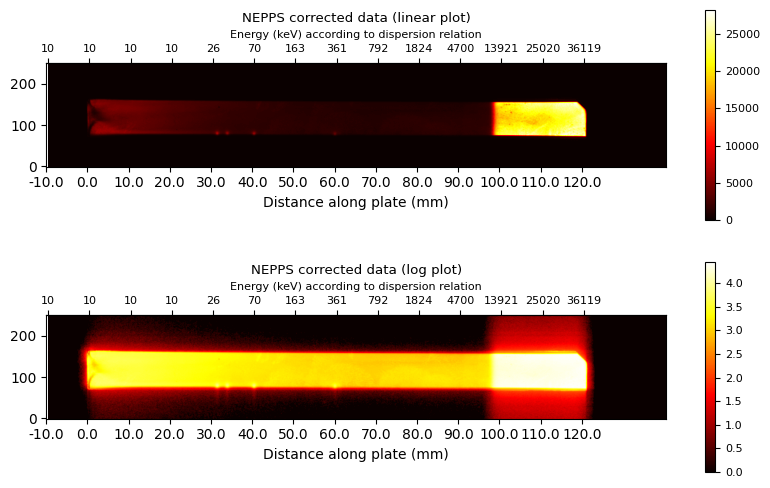

In [7]:
import h5py
import numpy as np
import cv2

with h5py.File('PLATE_1_SHOT_29.h5', "r") as f:

    base_items = list(f.items())
    #print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    #print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/PSL_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    #print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/PSL_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    #print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    #print(type(shot_data))

    x_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    import matplotlib.pyplot as plt

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    plt.rc('font', size=8)

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('Distance along plate (mm)')
    #axs[0].set_ylabel('Position along width of plate (Pixels)')
    axs[0].set_title('NEPPS corrected data (linear plot)')
    plt.colorbar(im1, ax=axs[0], label='')
    tick = np.arange(0, 1400, step=100)
    axs[0].set_xticks(tick-5, labels=0.1*(tick-100))

    ax0 = axs[0].secondary_xaxis('top')
    ax0.set_xticks(tick, labels=[int(i) for i in transform_proton_axis(tick-95,10)])
    ax0.set_xlabel('Energy (keV) according to dispersion relation')

    im2 = axs[1].imshow((1/np.log(10))*np.log(np.abs(shot_data+1)), cmap='hot', origin='lower')
    axs[1].set_xlabel('Distance along plate (mm)')
    #axs[1].set_ylabel('Position along width of plate (Pixels)')
    axs[1].set_title('NEPPS corrected data (log plot)')
    plt.colorbar(im2, ax=axs[1], label='')
    axs[1].set_xticks(tick-5, labels=0.1*(tick-100))

    ax1 = axs[1].secondary_xaxis('top')
    ax1.set_xticks(tick, labels=[int(i) for i in transform_proton_axis(tick-95,10)])
    ax1.set_xlabel('Energy (keV) according to dispersion relation')

NEPPS_1_29= shot_data
x_1_29_axis = x_axis


96.96670344
1065
Temperature in keV =  526.0031511675116
3.744203135280351


C:\Users\rayne\AppData\Local\Temp\ipykernel_17576\302077206.py:34: RuntimeWarning: invalid value encountered in log
  coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)


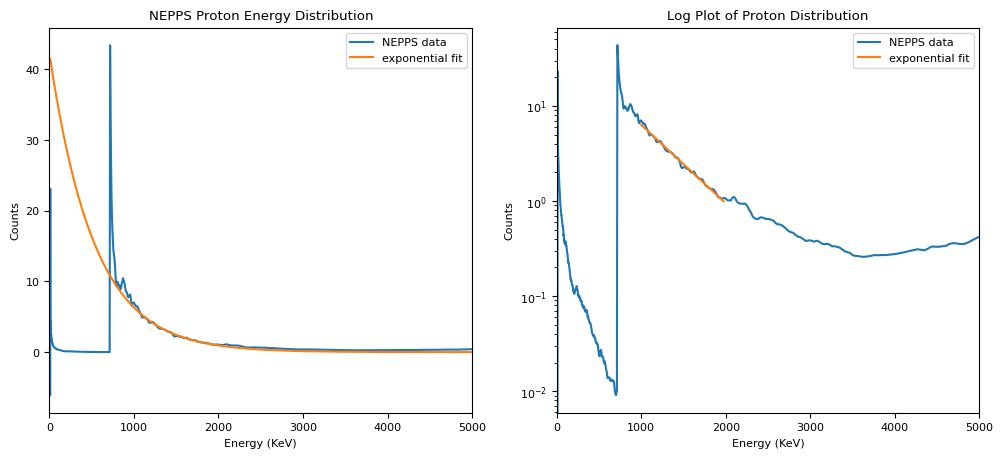

In [8]:
x = x_1_29_axis
edge = 95
E = transform_proton_axis(x-edge,10)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

################################

#dSdN = MS_proton_PSL_scale(E,nearzero=True)
dSdN = MS_proton_PSL_scale(E)

line = lineout(NEPPS_1_29, 90, 150)

dSdx = line-0.9*np.min(line[200:800])

dSdE = dSdx*dxdE_protons(x)

dNdE = dSdE/dSdN

axs[0].plot(E, dNdE, label='NEPPS data')
axs[0].set_xlim(0,5000)
axs[0].set_xlabel("Energy (KeV)")
axs[0].set_ylabel("Counts")
axs[0].set_title("NEPPS Proton Energy Distribution")

axs[1].semilogy(E, dNdE, label='NEPPS data')
axs[1].set_xlim(0,5000)
axs[1].set_xlabel("Energy (KeV)")
axs[1].set_ylabel("Counts")
axs[1].set_title("Log Plot of Proton Distribution")

start, end = find_index(E,1000,2000)

coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)
lin_fit = np.poly1d(coeff)
exp_fit = np.exp(coeff[1]+coeff[0]*E)
axs[1].plot(E[start:end], exp_fit[start:end], label='exponential fit')
axs[1].set_xlim(0,5000)

axs[0].plot(E, exp_fit, label='exponential fit')

axs[0].legend()
axs[1].legend()

print('Temperature in keV = ', -1/coeff[0])
print(coeff[1])
#axs[0,0].set_xlim(0,1000)
#axs[0,0].set_ylim(0,60000)
#axs[0,0].set_ylim(0,5000)

96.96670344
1065
Temperature in keV =  138.7916768539407
4.282850842347884


C:\Users\rayne\AppData\Local\Temp\ipykernel_17576\2280286631.py:36: RuntimeWarning: invalid value encountered in log
  coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)


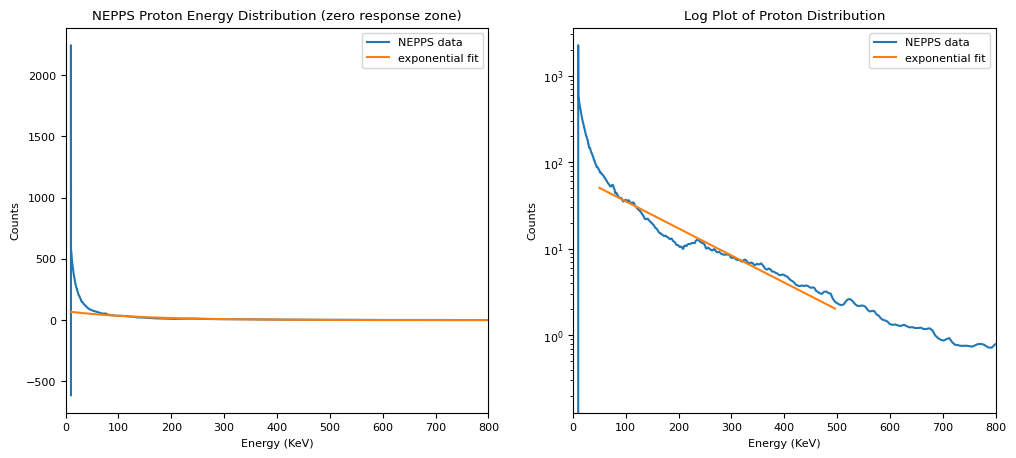

In [9]:
x = x_1_29_axis
edge = 95
E = transform_proton_axis(x-edge,10)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

################################

#dSdN = MS_proton_PSL_scale(E,nearzero=True)
dSdN = 1

line = lineout(NEPPS_1_29, 95, 150)

dSdx = line-0.9*np.min(line[200:800])

dSdE = dSdx*dxdE_protons(x)

dNdE = dSdE/dSdN

axs[0].plot(E, dNdE, label='NEPPS data')
axs[0].set_xlim(0,800)
axs[0].set_xlabel("Energy (KeV)")
axs[0].set_ylabel("Counts")
axs[0].set_title("NEPPS Proton Energy Distribution (zero response zone)")

axs[1].semilogy(E, dNdE, label='NEPPS data')
axs[1].set_xlim(0,800)
axs[1].set_xlabel("Energy (KeV)")
axs[1].set_ylabel("Counts")
axs[1].set_title("Log Plot of Proton Distribution")

#start, end = find_index(E,10,80)
start, end = find_index(E,50,500)
#start, end = find_index(E,300,600)

coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)
lin_fit = np.poly1d(coeff)
exp_fit = np.exp(coeff[1]+coeff[0]*E)
axs[1].plot(E[start:end], exp_fit[start:end], label='exponential fit')
axs[1].set_xlim(0,800)

axs[0].plot(E, exp_fit, label='exponential fit')

axs[0].legend()
axs[1].legend()

print('Temperature in keV = ', -1/coeff[0])
print(coeff[1])
#axs[0,0].set_xlim(0,1000)
#axs[0,0].set_ylim(0,60000)
#axs[0,0].set_ylim(0,5000)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
96.96670344
11
96.96670344
11


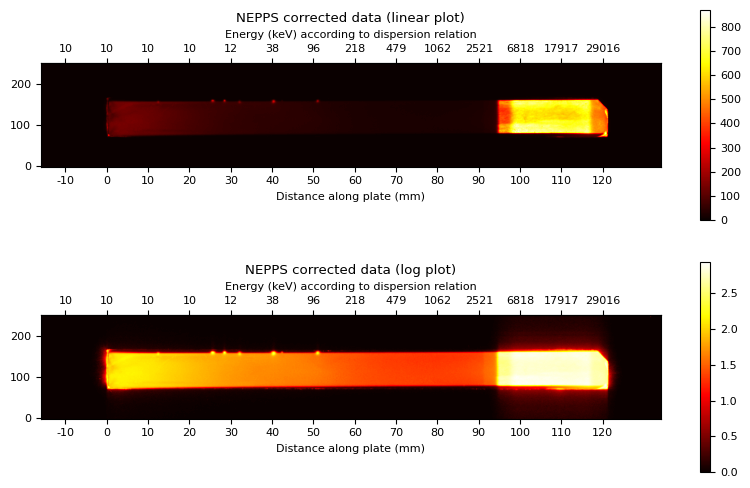

In [18]:
import h5py
import numpy as np
import cv2

with h5py.File('PLATE_7_SHOT_28.h5', "r") as f:
#with h5py.File('TD_TC000-000_NEPPS_IMAGE-PLATE-7_SCAN-T_RAW-IMAGE-PLATE_N241228-001-999.h5', "r") as f:

    base_items = list(f.items())
    #print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    #print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/PSL_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    #print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/PSL_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    #print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    #print(type(shot_data))

    x_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/PSL_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    import matplotlib.pyplot as plt

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    plt.rc('font', size=8)

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('Distance along plate (mm)')
    #axs[0].set_ylabel('Position along width of plate (Pixels)')
    axs[0].set_title('NEPPS corrected data (linear plot)')
    plt.colorbar(im1, ax=axs[0], label='')
    tick = np.arange(0, 1400, step=100)
    axs[0].set_xticks(tick+59, labels=[int(i) for i in 0.1*(tick-100)])

    ax0 = axs[0].secondary_xaxis('top')
    ax0.set_xticks(tick+59, labels=[int(i) for i in transform_proton_axis(tick-159,10)])
    ax0.set_xlabel('Energy (keV) according to dispersion relation')

    im2 = axs[1].imshow((1/np.log(10))*np.log(np.abs(shot_data+1)), cmap='hot', origin='lower')
    axs[1].set_xlabel('Distance along plate (mm)')
    #axs[1].set_ylabel('Position along width of plate (Pixels)')
    axs[1].set_title('NEPPS corrected data (log plot)')
    plt.colorbar(im2, ax=axs[1], label='')
    axs[1].set_xticks(tick+59, labels=[int(i) for i in 0.1*(tick-100)])

    ax1 = axs[1].secondary_xaxis('top')
    ax1.set_xticks(tick+59, labels=[int(i) for i in transform_proton_axis(tick-159,10)])
    ax1.set_xlabel('Energy (keV) according to dispersion relation')

NEPPS_7_28= shot_data
x_7_28_axis = x_axis

96.96670344
1129
893 941
Temperature in keV =  331.3784217267647


C:\Users\rayne\AppData\Local\Temp\ipykernel_17576\2135207123.py:39: RuntimeWarning: invalid value encountered in log
  coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)


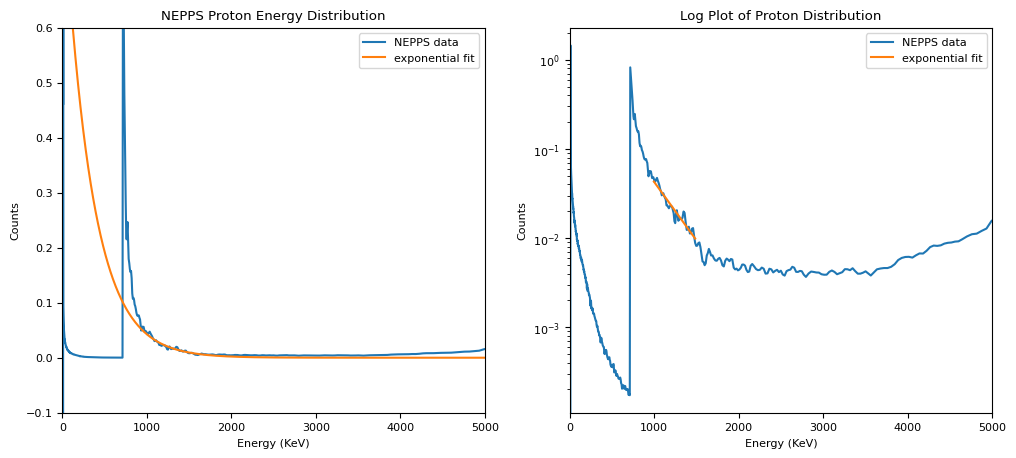

In [11]:
x = x_7_28_axis
edge = 159
E = transform_proton_axis(x-edge,10)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

################################

#dSdN = MS_proton_PSL_scale(E,nearzero=True)
dSdN = MS_proton_PSL_scale(E)

line = lineout(NEPPS_7_28, 95, 100)

#dSdx = line-0.97*np.min(line[893:974])
dSdx = line-0.9*np.min(line[893:974])
#dSdx = line

dSdE = dSdx*dxdE_protons(x)

dNdE = dSdE/dSdN

axs[0].plot(E, dNdE, label='NEPPS data')
axs[0].set_xlim(0,5000)
axs[0].set_ylim(-0.1,0.6)
axs[0].set_xlabel("Energy (KeV)")
axs[0].set_ylabel("Counts")
axs[0].set_title("NEPPS Proton Energy Distribution")

axs[1].semilogy(E, dNdE, label='NEPPS data')
axs[1].set_xlim(0,5000)
axs[1].set_xlabel("Energy (KeV)")
axs[1].set_ylabel("Counts")
axs[1].set_title("Log Plot of Proton Distribution")

#start, end = find_index(E,750,1200)
start, end = find_index(E,1000,1500)
print(start, end)

coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)
lin_fit = np.poly1d(coeff)
exp_fit = np.exp(coeff[1]+coeff[0]*E)
axs[1].plot(E[start:end], exp_fit[start:end], label='exponential fit')
axs[1].set_xlim(0,5000)

axs[0].plot(E, exp_fit, label='exponential fit')

axs[0].legend()
axs[1].legend()

print('Temperature in keV = ', -1/coeff[0])
#axs[0,0].set_xlim(0,1000)
#axs[0,0].set_ylim(0,60000)
#axs[0,0].set_ylim(0,5000)

96.96670344
1129
Temperature in keV =  98.42522348320998
0.6657314454977714


C:\Users\rayne\AppData\Local\Temp\ipykernel_17576\2188740633.py:35: RuntimeWarning: invalid value encountered in log
  coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)


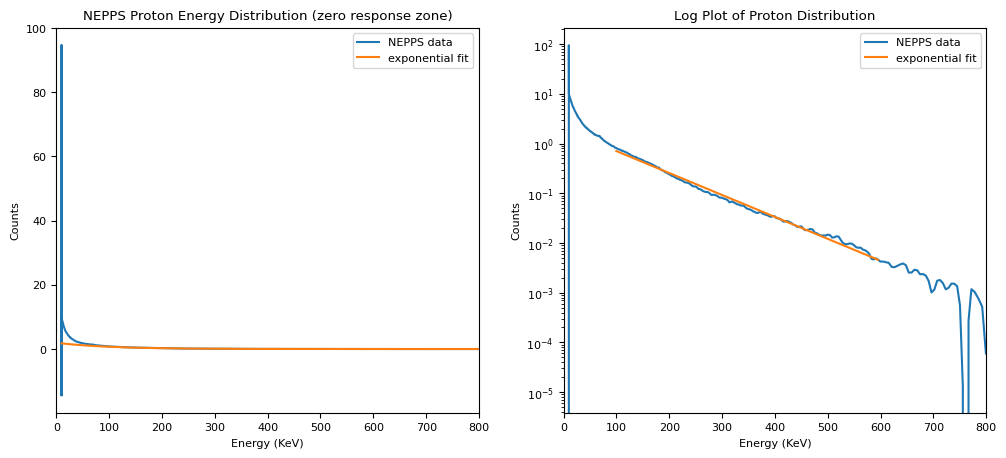

In [12]:
x = x_7_28_axis
edge = 159
E = transform_proton_axis(x-edge,10)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

################################

#dSdN = MS_proton_PSL_scale(E,nearzero=True)
dSdN = 1

line = lineout(NEPPS_7_28, 95, 150)

dSdx = line-0.9*np.min(line[200:800])

dSdE = dSdx*dxdE_protons(x)

dNdE = dSdE/dSdN

axs[0].plot(E, dNdE, label='NEPPS data')
axs[0].set_xlim(0,800)
axs[0].set_xlabel("Energy (KeV)")
axs[0].set_ylabel("Counts")
axs[0].set_title("NEPPS Proton Energy Distribution (zero response zone)")

axs[1].semilogy(E, dNdE, label='NEPPS data')
axs[1].set_xlim(0,800)
axs[1].set_xlabel("Energy (KeV)")
axs[1].set_ylabel("Counts")
axs[1].set_title("Log Plot of Proton Distribution")

#start, end = find_index(E,10,40)
start, end = find_index(E,100,600)

coeff = np.polyfit(E[start:end], np.log(dNdE)[start:end],1)
lin_fit = np.poly1d(coeff)
exp_fit = np.exp(coeff[1]+coeff[0]*E)
axs[1].plot(E[start:end], exp_fit[start:end], label='exponential fit')
axs[1].set_xlim(0,800)

axs[0].plot(E, exp_fit, label='exponential fit')

axs[0].legend()
axs[1].legend()

print('Temperature in keV = ', -1/coeff[0])
print(coeff[1])
#axs[0,0].set_xlim(0,1000)
#axs[0,0].set_ylim(0,60000)
#axs[0,0].set_ylim(0,5000)

96.96670344
1129


Text(0.5, 1.0, 'calculated dN/dE')

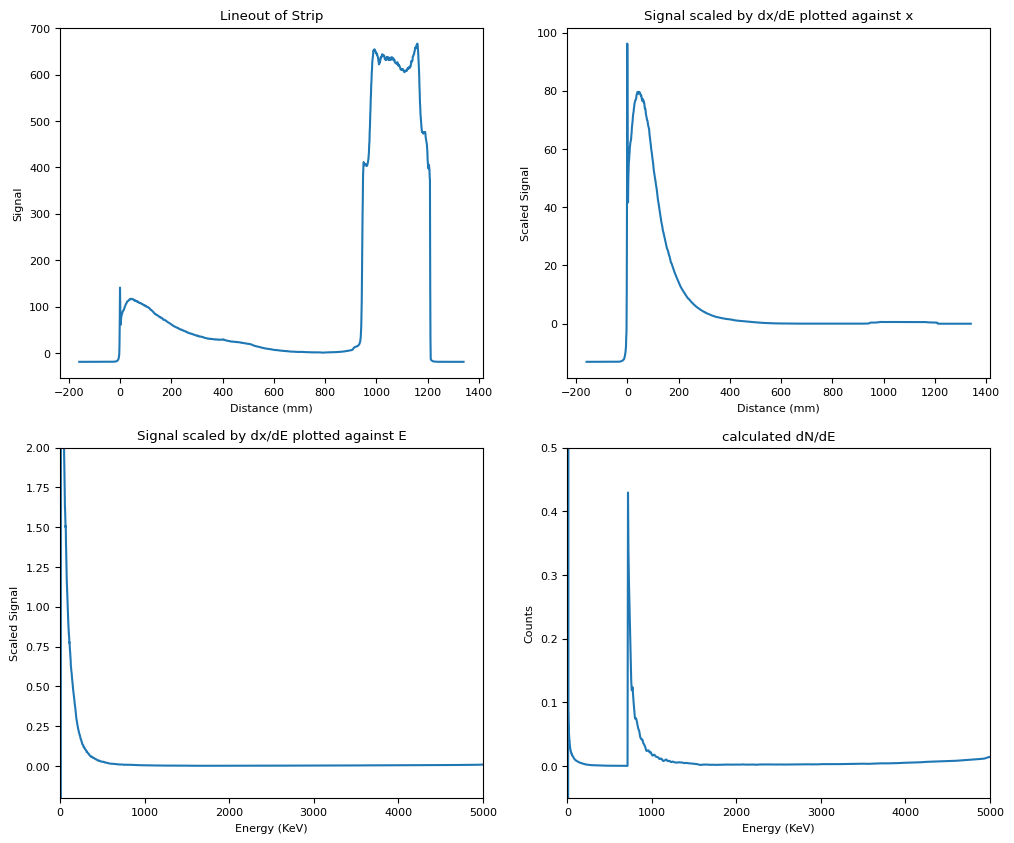

In [13]:
x = x_7_28_axis
edge = 159
E = transform_proton_axis(x-edge,10)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

################################

dSdN = MS_proton_PSL_scale(E)

line = lineout(NEPPS_7_28, 95, 150)

dSdx = line-0.97*np.min(line[893:974])

axs[0,0].plot(x-edge, dSdx, label='Lineout of Strip')
axs[0,0].set_xlabel("Distance (mm)")
axs[0,0].set_ylabel("Signal")
axs[0,0].set_title("Lineout of Strip")

dSdE = dSdx*dxdE_protons(x)

axs[0,1].plot(x-edge, dSdE, label='NEPPS data')
axs[0,1].set_xlabel("Distance (mm)")
axs[0,1].set_ylabel("Scaled Signal")
axs[0,1].set_title("Signal scaled by dx/dE plotted against x")

axs[1,0].plot(E, dSdE, label='NEPPS data')
axs[1,0].set_xlim(0,5000)
axs[1,0].set_ylim(-0.2,2)
axs[1,0].set_xlabel("Energy (KeV)")
axs[1,0].set_ylabel("Scaled Signal")
axs[1,0].set_title("Signal scaled by dx/dE plotted against E")

axs[1,1].plot(E[55:], dSdE[55:]/dSdN[55:], label='NEPPS data')
axs[1,1].set_xlim(0,5000)
axs[1,1].set_ylim(-0.05,0.5)
axs[1,1].set_xlabel("Energy (KeV)")
axs[1,1].set_ylabel("Counts")
axs[1,1].set_title("calculated dN/dE")

(95.0, 700.0)

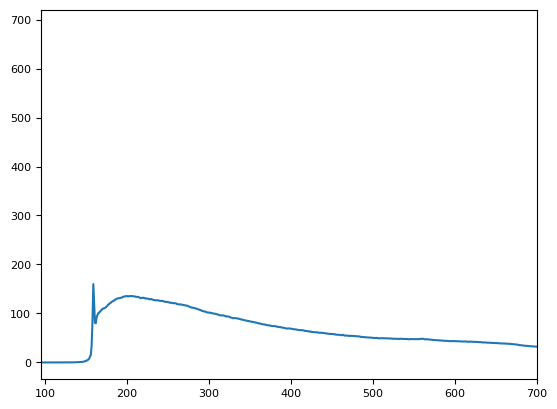

In [ ]:
plt.plot(x_axis,line)
plt.xlim(95,700)

items in the ATTRIBUTES directory: [('CAMPAIGN_SHOT_ID', <HDF5 dataset "CAMPAIGN_SHOT_ID": shape (1,), type "|S26">), ('FILE_TYPE', <HDF5 dataset "FILE_TYPE": shape (1,), type "|S14">), ('IMAGE_HEIGHT', <HDF5 dataset "IMAGE_HEIGHT": shape (1,), type "<i4">), ('IMAGE_PLATE_SERIAL', <HDF5 dataset "IMAGE_PLATE_SERIAL": shape (1,), type "|S8">), ('IMAGE_PLATE_TYPE', <HDF5 dataset "IMAGE_PLATE_TYPE": shape (1,), type "|S15">), ('IMAGE_WIDTH', <HDF5 dataset "IMAGE_WIDTH": shape (1,), type "<i4">), ('LATITUDE', <HDF5 dataset "LATITUDE": shape (1,), type "<i4">), ('OPERATOR', <HDF5 dataset "OPERATOR": shape (1,), type "|S2">), ('OPERATOR_COMMENT', <HDF5 dataset "OPERATOR_COMMENT": shape (1,), type "|S93">), ('PIXEL_DEPTH', <HDF5 dataset "PIXEL_DEPTH": shape (1,), type "<i4">), ('PIXEL_SIZE_X', <HDF5 dataset "PIXEL_SIZE_X": shape (1,), type "<i4">), ('PIXEL_SIZE_Y', <HDF5 dataset "PIXEL_SIZE_Y": shape (1,), type "<i4">), ('PLATE_IMG', <HDF5 group "/ATTRIBUTES/PLATE_IMG" (1 members)>), ('SCANNER

64443

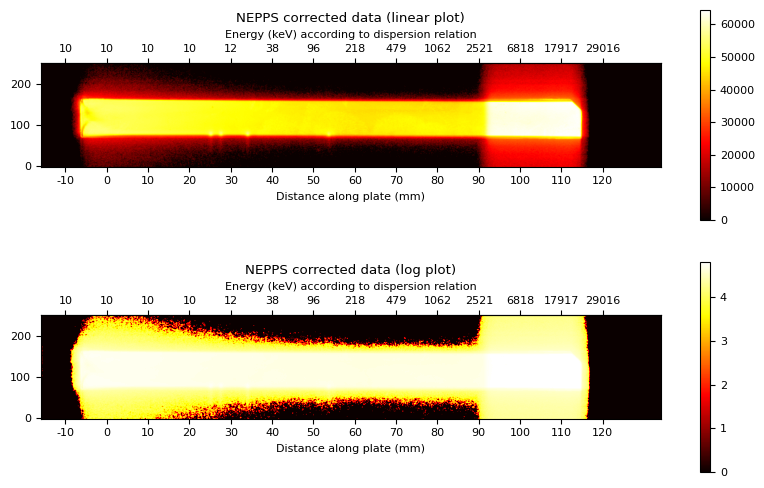

: 

In [ ]:
import h5py
import numpy as np
import cv2

with h5py.File('TD_TC000-000_NEPPS_IMAGE-PLATE-1_SCAN-H_RAW-IMAGE-PLATE_N241229-001-999.h5', "r") as f:

    base_items = list(f.items())
    #print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/PLATE_IMG')
    shot_image_list = list(shot_image_folder.items())
    print('items in the PLATE_IMG directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/PLATE_IMG/DATA')
    shot_data_list = list(shot_data_folder.items())
    print('items in the PLATE_IMG directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/PLATE_IMG/DATA/DATA')
    shot_data = np.array(shot_data)
    print(type(shot_data))

    x_axis = f.get('/ATTRIBUTES/PLATE_IMG/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    #print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/PLATE_IMG/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    #print(type(y_axis))

    import matplotlib.pyplot as plt

    #plt.imshow(shot_data)
    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    plt.rc('font', size=8)

    im1 = axs[0].imshow(shot_data, cmap='hot', origin='lower')
    axs[0].set_xlabel('Distance along plate (mm)')
    #axs[0].set_ylabel('Position along width of plate (Pixels)')
    axs[0].set_title('NEPPS corrected data (linear plot)')
    plt.colorbar(im1, ax=axs[0], label='')
    tick = np.arange(0, 1400, step=100)
    axs[0].set_xticks(tick+59, labels=[int(i) for i in 0.1*(tick-100)])

    ax0 = axs[0].secondary_xaxis('top')
    ax0.set_xticks(tick+59, labels=[int(i) for i in transform_proton_axis(tick-159,10)])
    ax0.set_xlabel('Energy (keV) according to dispersion relation')

    im2 = axs[1].imshow((1/np.log(10))*np.log(np.abs(shot_data+1)), cmap='hot', origin='lower')
    axs[1].set_xlabel('Distance along plate (mm)')
    #axs[1].set_ylabel('Position along width of plate (Pixels)')
    axs[1].set_title('NEPPS corrected data (log plot)')
    plt.colorbar(im2, ax=axs[1], label='')
    axs[1].set_xticks(tick+59, labels=[int(i) for i in 0.1*(tick-100)])

    ax1 = axs[1].secondary_xaxis('top')
    ax1.set_xticks(tick+59, labels=[int(i) for i in transform_proton_axis(tick-159,10)])
    ax1.set_xlabel('Energy (keV) according to dispersion relation')

NEPPS_7_28= shot_data
x_7_28_axis = x_axis

np.max(shot_data)